![Shark attacks, a project by Roberto Henríquez Perozo. Data Analytics Bootcamp at IronHack](INPUT/shark-attacks.png)

<center>You can clone the repo of this project at <br>https://github.com/rihp/shark-attacks </center>

 <center><h1> PART II <br> Data analysis and hypothesis formulation</h1> </center>
 
 

In [1]:
# You should have an exported.csv file. 
# We generated it while following along the 'PART I' of this project. 
# Do you have it?
!ls
# If you don't, you can download the 'PART I' from: https://github.com/rihp/shark-attacks

analysis.ipynb	clean.ipynb   INPUT   README.md
attacks.csv	exported.csv  OUTPUT


In [33]:
# Importing modules
import pandas as pd
import numpy as np
import random
import matplotlib

pd.compat.PY3 = True
%matplotlib inline

In [3]:
# Loading the cleaned dataset as a dataframe
df = pd.read_csv('OUTPUT/exported.csv', encoding='latin-1')
df

UnicodeEncodeError: 'ascii' codec can't encode character u'\x92' in position 12103: ordinal not in range(128)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd7 in position 0: ordinal not in range(128)

In [4]:
# Review the columns of the exported dataset
df.columns

Index(['Unnamed: 0',    'CaseNum',       'Date',       'Year',       'Type',
          'Country',       'Area',   'Location',   'Activity',        'Sex',
           'Injury',      'Fatal',    'Species',     'Source',       'href',
         'Species2',  'Activity2'],
      dtype='object')

# 🎣️  BASIC GRAPHS

### FATALITIES

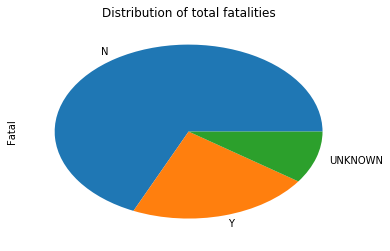

In [5]:
# Total Fatalities include unknown values

s_fatal = df.Fatal.value_counts()
s_fatal.plot.pie(title='Distribution of total fatalities')

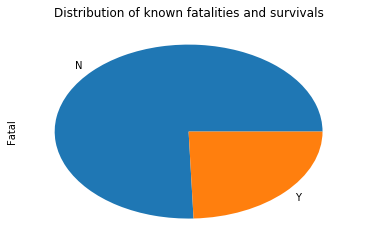

In [41]:
# Taking out the unkown values

fatals_filter = df[~df.Fatal.isin(['UNKNOWN'])]
fatals_filter.Fatal.value_counts().plot.pie(title='Distribution of known fatalities and survivals')

### PROVOKED AND UNPROVOKED ATTACKS

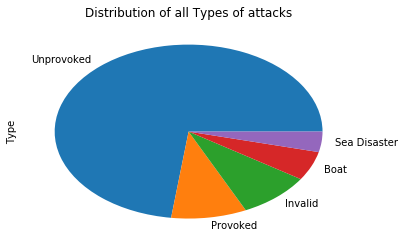

In [6]:
# Types of attack
s_types = df.Type.value_counts()
s_types.plot.pie(title='Distribution of all Types of attacks')

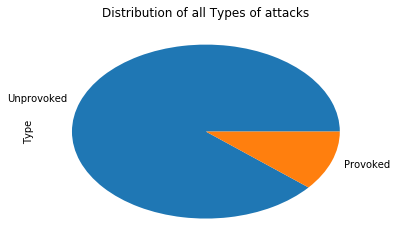

In [47]:
# Types of attack
types_filter = df[df.Type.isin(['Provoked', 'Unprovoked'])]
types_filter.Type.value_counts().plot.pie(title='Distribution of all Types of attacks')

### SPECIES

In [59]:
species_filt = df[
    ~df.Species2.isin(['INVALID ENTRY', 'OTHER / NOT KNOWN'])]

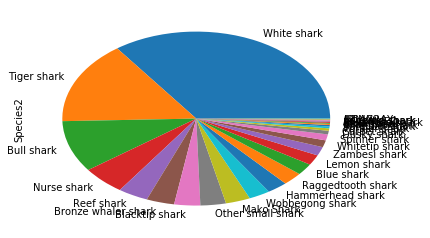

In [60]:
species_filt.Species2.value_counts().plot.pie()

In [71]:
top_sharks = []
for e in list(species_filt.Species2.value_counts().head(5).items()):
    print top_sharks.append(e[0])
top_sharks

None
None
None
None
None


[u'White shark', u'Tiger shark', u'Bull shark', u'Nurse shark', u'Reef shark']

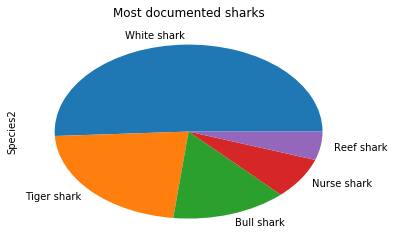

In [88]:
# Top sharks represented and filtered
species_filt.Species2[df.Species2.isin(top_sharks)].value_counts().plot.pie(
    title='Most documented sharks')

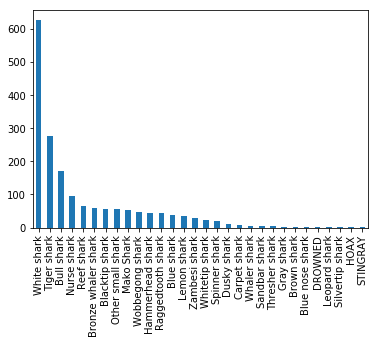

In [11]:
df.Species2[~df.Species2.isin(['INVALID ENTRY',
                               'OTHER / NOT KNOWN'])
           ].value_counts().plot.bar()

In [12]:
df[~df['Fatal'].isin(['UNKNOWN'])][['Species2', 'Fatal']]

UnicodeDecodeError: 'ascii' codec can't decode byte 0xd7 in position 0: ordinal not in range(128)

               Species2 Fatal
0           White shark     N
1         INVALID ENTRY     N
2         INVALID ENTRY     N
3     OTHER / NOT KNOWN     N
4           Tiger shark     N
5         INVALID ENTRY     N
6           Tiger shark     Y
7           Lemon shark     N
8            Bull shark     N
9         INVALID ENTRY     N
10           Reef shark     N
11        INVALID ENTRY     N
12        INVALID ENTRY     N
13        INVALID ENTRY     N
14          Nurse shark     N
15        INVALID ENTRY     N
16    OTHER / NOT KNOWN     N
17        INVALID ENTRY     N
18          Tiger shark     N
19        INVALID ENTRY     N
20        INVALID ENTRY     N
21    OTHER / NOT KNOWN     N
22          White shark     N
23          Tiger shark     N
24          White shark     N
25    OTHER / NOT KNOWN     N
26           Bull shark     N
28        INVALID ENTRY     N
29        INVALID ENTRY     N
30          Tiger shark     N
...                 ...   ...
6271      INVALID ENTRY     N
6272      

# The 5 species with the most registered attacks have a higher *fatalities/survivals ratio* when these attacks are 'PROVOKED' by the victims.

before, I wanted to make a new column that specifies, the species and if it was deadly or not
Firts, I'll take any values which don't contribute to our research, and focus only on the deadliest species

In [14]:
df.Species2.value_counts()

INVALID ENTRY          3052
OTHER / NOT KNOWN      1467
White shark             625
Tiger shark             275
Bull shark              171
Nurse shark              94
Reef shark               65
Bronze whaler shark      60
Blacktip shark           56
Other small shark        55
Mako Shark               53
Wobbegong shark          46
Hammerhead shark         44
Raggedtooth shark        43
Blue shark               38
Lemon shark              34
Zambesi shark            29
Whitetip shark           23
Spinner shark            20
Dusky shark              12
Carpet shark              8
Whaler shark              6
Sandbar shark             5
Thresher shark            4
Brown shark               3
Gray shark                3
Blue nose shark           2
Leopard shark             2
Silvertip shark           2
DROWNED                   2
HOAX                      2
STINGRAY                  1
Name: Species2, dtype: int64

In [15]:
# Define the sharks I want to consider
killer_sharks =['White shark',
                'Tiger shark',
                'Bull shark',
                'Nurse shark', 
                'Reef shark',
                'Bronze whaler shark']

# How many samples of each species are there?
print(df.Species2[df.Species2.isin(killer_sharks)].value_counts())

# Create a dataframe containing only the indexes with those species
species_fatality = df[df.Species2.isin(killer_sharks)]
#df.Species2.value_counts()

White shark            625
Tiger shark            275
Bull shark             171
Nurse shark             94
Reef shark              65
Bronze whaler shark     60
Name: Species2, dtype: int64


In [16]:
species_fatality = df[df.Species2.isin(killer_sharks)]

In [17]:
species_fatality = species_fatality#.reset_index()


#species_fatality[['Fatal', 'Species2']]
#species_fatality[fatals_filetred]#.value_counts()

In [18]:
dfx = species_fatality[fatals_filetred]

/home/rh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [19]:
#dfx

In [20]:
print(dfx.Fatal.value_counts())
print()
print(dfx.Species2.value_counts())

N    1020
Y     251
Name: Fatal, dtype: int64
()
White shark            614
Tiger shark            271
Bull shark             170
Nurse shark             93
Reef shark              64
Bronze whaler shark     59
Name: Species2, dtype: int64


# 🦈️At this point, the data is clean enough to create the plot
## Grouping by Species, and then Fatality

In [22]:
dfx['Victim_died'] = np.where(dfx.Fatal.isin(['Y']), True, False)
dfx['Victim_survived'] = np.where(dfx.Fatal.isin(['N']), True, False)

/home/rh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/rh/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
toplot =dfx.groupby(['Species2','Fatal']).agg({'Victim_survived':'sum', 'Victim_died':'sum'})

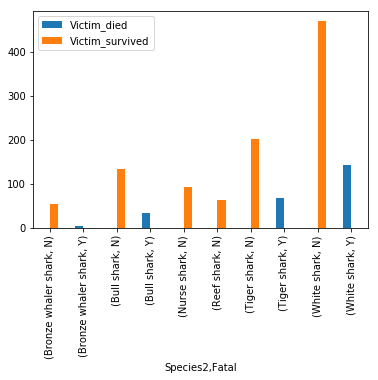

In [24]:
toplot.plot.bar()

In [25]:
toplot

Victim_died  Victim_survived
Species2            Fatal                              
Bronze whaler shark N              0.0             55.0
                    Y              4.0              0.0
Bull shark          N              0.0            135.0
                    Y             35.0              0.0
Nurse shark         N              0.0             93.0
Reef shark          N              0.0             64.0
Tiger shark         N              0.0            202.0
                    Y             69.0              0.0
White shark         N              0.0            471.0
                    Y            143.0              0.0

In [26]:
toplot.T.columns

MultiIndex(levels=[['Bronze whaler shark', 'Bull shark', 'Nurse shark', 'Reef shark', 'Tiger shark', 'White shark'], ['N', 'Y']],
           codes=[[0, 0, 1, 1, 2, 3, 4, 4, 5, 5], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1]],
           names=['Species2', 'Fatal'])

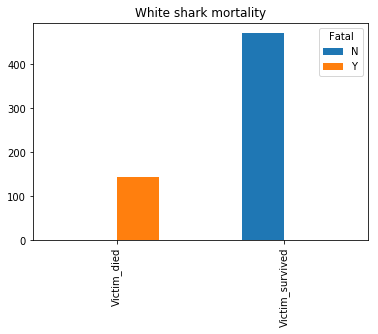

In [27]:
examine = "White shark"
toplot.T[examine].plot.bar(title='{} mortality'.format(examine))

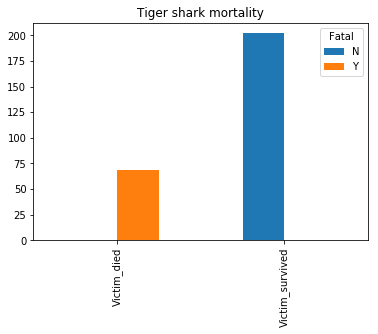

In [28]:
examine = 'Tiger shark'
toplot.T[examine].plot.bar(title='{} mortality'.format(examine))

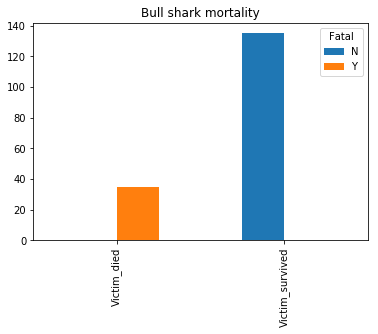

In [29]:
examine = 'Bull shark'
toplot.T[examine].plot.bar(title='{} mortality'.format(examine))

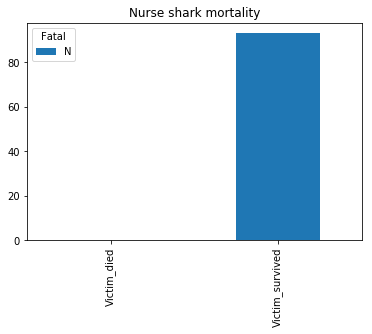

In [30]:
examine = 'Nurse shark'
toplot.T[examine].plot.bar(title='{} mortality'.format(examine))

In [31]:
df.columns

Index(['Unnamed: 0',    'CaseNum',       'Date',       'Year',       'Type',
          'Country',       'Area',   'Location',   'Activity',        'Sex',
           'Injury',      'Fatal',    'Species',     'Source',       'href',
         'Species2',  'Activity2',     'Decade'],
      dtype='object')

In [32]:
dfx[['Species2','Fatal2']].groupby('Species2').agg({'Fatal':"count"})

KeyError: "['Fatal2'] not in index"

In [ ]:
sx = df.groupby(["Fatal", "Species2"]).agg({"Date":["min", "max"]})
sx

In [ ]:
sx = df.groupby(["Fatal", "Species2"]).agg({"Date":["min", "max"]})
sx

In [ ]:
def filt(x):
    if x =='UNKNOWN':
        return None
    else:
        return x
df.reset_index()
Fatal_na = df.Fatal.isin(['UNKNOWN'])
Species_na = df.Species2.isin(['INVALID ENTRY', 'OTHER / NOT KNOWN'])
sx = df.loc[~Fatal_na].groupby(["Fatal", "Species2"]).agg({"Type":"count"})
sy = df.loc[~Species_na]
# avoid.value_counts()
#Species_na.value_counts()
#df[~Fatal_na, ~Species_na]
sp_na = df[~Species_na]
df_nonull = sp_na[~Fatal_na]

In [ ]:
df_ok = df_nonull.reset_index()
# df_ok.head().plot.scatter(df_ok.Species2,df_ok.Fatal)

In [ ]:
matplotlib.pyplot.scatter(df_nonull.Fatal, df_nonull.Species2)


In [ ]:
dfx = df[['Species2','Fatal']]
dfx.isnull().sum()

In [ ]:
avoid1 = ~df['Fatal'].isin(['UNKNOWN'])
avoid2 = ~df['Species2'].isin(['OTHER / NOT KNOWN', 'INVALID ENTRY'])
df2p = df[avoid1][avoid2][['Species2', 'Fatal']]
#df2p.plot.bar('Fatal', 'Species2')

In [ ]:
df2p.Fatal.values

In [ ]:
df2p.Species2.values

In [ ]:
Yes = (lambda x: True if x == 'Y' else False)
df2p.groupby('Species2').agg({"Fatal" : Yes})

In [ ]:
df.columns

In [7]:
# This plot is a mess, don't graph it
#df.Location[df.Location.value_counts() > 20].value_counts().plot.pie()

In [8]:
# IDEA: make bins to filter the years when it happened

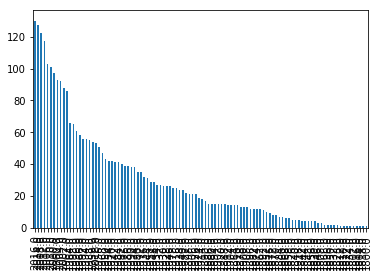

In [9]:
Years2p = list(range(1800,2020,2))
df.Year[df.Year.isin(Years2p)].value_counts().plot.bar()

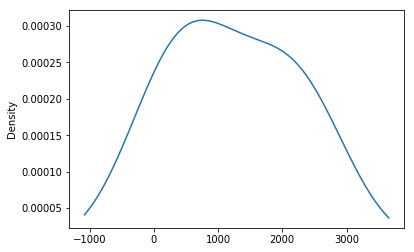

In [10]:
df["Decade"] = pd.cut(df.Year,
                            bins=[1800,1850,1900,1950,2000,2050])
                            #, 
#                            labels=range(1800,2020,10))
df.Decade.value_counts().plot.density()